# Laboratorio de regresión - 2

|                |   |
:----------------|---|
| **Nombre**     David Alejandro Rangel Rodríguez |   |
| **Fecha**     29 de enero del 2026 |   |
| **Expediente*756203* |   |

## Regresión polinomial

Observa la siguiente gráfica.

In [16]:
import matplotlib.pyplot as plt; import numpy as np
%matplotlib inline
np.random.seed(0)
x = np.linspace(-3, 3, 100); y = 1 + 4*x**2 + np.random.normal(0, 1, 100)
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()

Utiliza `sklearn` para realizar una regresión lineal simple ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x $)

In [17]:
from sklearn.linear_model import LinearRegression
X = x.reshape(-1, 1)
lr = LinearRegression()
lr.fit(X, y)
lr.intercept_

np.float64(13.30223225795873)

In [18]:
lr.coef_

array([-0.04955448])

Crea una gráfica donde se muestren las observaciones como una nube de puntos y la línea que ajustaste con regresión. Calcula el métrico $R^2$.

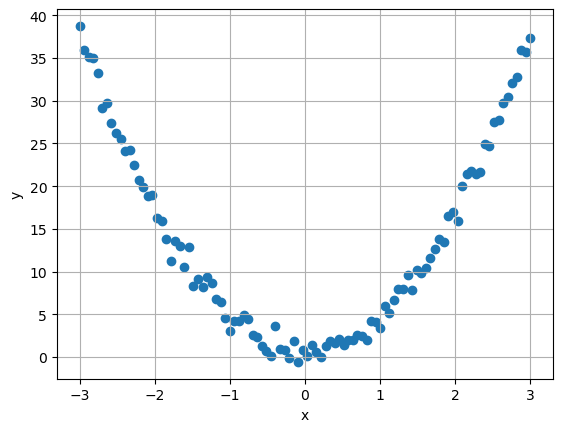

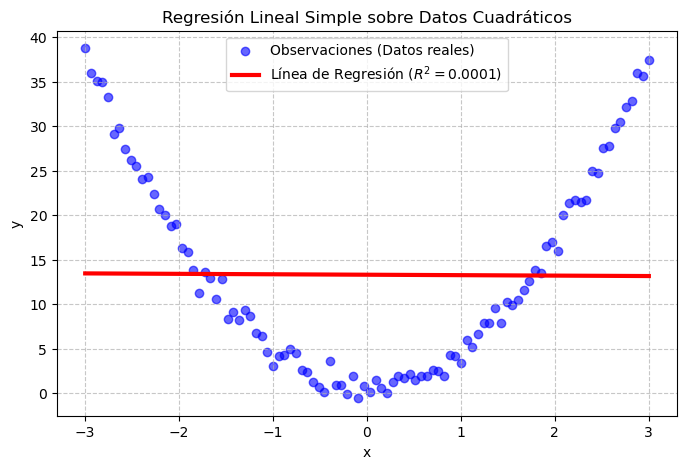

El coeficiente de determinación R^2 es: 5.80345273922811e-05


In [19]:
import matplotlib.pyplot as plt

y_pred = lr.predict(X)
r2 = r2_score(y, y_pred)

# 5. Graficar resultados
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='blue', alpha=0.6, label='Observaciones (Datos reales)')
plt.plot(x, y_pred, color='red', linewidth=3, label=f'Línea de Regresión ($R^2 = {r2:.4f}$)')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresión Lineal Simple sobre Datos Cuadráticos")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print(f"El coeficiente de determinación R^2 es: {r2}")

Podemos ver que el ajuste no es correcto, pues parece que tiene un comportamiento cuadrático y estamos intentando ajustar una línea recta.

En lugar de hacer una regresión lineal simple, quizás podamos extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + ... + \beta_p X^p + \epsilon$$

Ajusta un modelo cuadrático con `sklearn` ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x + \hat{\beta_1}x^2 $) y calcula su $R^2$.

In [21]:
x1 = np.array(x).reshape(-1, 1)
lr = LinearRegression()
X1 = np.hstack([x1])
lr.fit(X1,y)
lr.intercept_

np.float64(13.30223225795873)

In [22]:
x2 = x1 * x1
X2 = np.hstack([x1,x2])
lr = LinearRegression()
lr.fit(X2,y)
lr.intercept_

np.float64(0.619420963180481)

In [24]:
lr.coef_

array([-0.04955448,  4.14388884])

Crea una gráfica con las observaciones y la nueva curva que ajustaste.

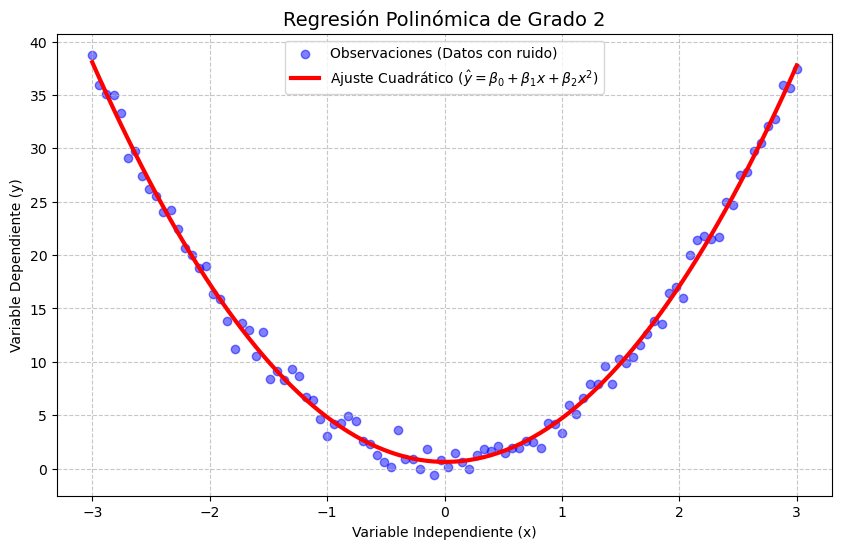

Intersección (Beta 0): 0.6194
Coeficientes (Beta 1, Beta 2): [-0.04955448  4.14388884]


In [25]:
# 1. Realizar las predicciones con el modelo cuadrático entrenado
y_pred_quad = lr.predict(X2)

# 2. Crear la visualización
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.5, label='Observaciones (Datos con ruido)')
plt.plot(x, y_pred_quad, color='red', linewidth=3, label='Ajuste Cuadrático ($\hat{y} = \\beta_0 + \\beta_1x + \\beta_2x^2$)')

# Personalización de la gráfica
plt.title("Regresión Polinómica de Grado 2", fontsize=14)
plt.xlabel("Variable Independiente (x)")
plt.ylabel("Variable Dependiente (y)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Imprimir los parámetros calculados
print(f"Intersección (Beta 0): {lr.intercept_:.4f}")
print(f"Coeficientes (Beta 1, Beta 2): {lr.coef_}")

Ajusta modelos de grados 3, 5, 7, 9, y 11. Calcula su $R^2$.

## Regresión Grado 3

In [26]:
x2 = x1 * x1
x3 = x2 * x1
X3 = np.hstack([x1,x2,x3])
lr = LinearRegression()
lr.fit(X3,y)
lr.intercept_

np.float64(0.6194209631804863)

In [27]:
lr.coef_

array([-6.55753967e-02,  4.14388884e+00,  2.90847549e-03])

Para la regresion de **grado 3**:
*  $\beta_0$ = 0.61942
*  $\beta_1$ = -0.0655753
*  $\beta_2$ = 4.14388
*  $\beta_3$ = 0.0029084

## Regresión Grado 5

In [31]:
x4 = x3 * x1
x5 = x4 * x1
X5 = np.hstack([x1,x2,x3,x4,x5])
lr = LinearRegression()
lr.fit(X5,y)
lr.intercept_

np.float64(0.6337116478282763)

In [32]:
lr.coef_

array([-2.76393644e-01,  4.12831746e+00,  1.10135698e-01,  1.97920171e-03,
       -1.05167018e-02])

Para la regresion de **grado 5**:
*  $\beta_0$ = 0.633711
*  $\beta_1$ = -0.2763936
*  $\beta_2$ = 4.12831
*  $\beta_3$ = 0.110135
*  $\beta_4$ = 0.0019792
*  $\beta_5$ = -0.0105167

## Regresión Grado 7

In [34]:
x6 = x5 * x1
x7 = x6 * x1
X7 = np.hstack([x1,x2,x3,x4,x5,x6,x7])
lr = LinearRegression()
lr.fit(X7,y)
lr.intercept_

np.float64(0.6101810919961732)

In [35]:
lr.coef_

array([-1.75155617e-01,  4.18219958e+00,  1.07431886e-02, -1.56446593e-02,
        1.33331414e-02,  1.40889740e-03, -1.61012799e-03])

Para la regresion de **grado 7**:
*  $\beta_0$ = 0.610181
*  $\beta_1$ = -0.17515
*  $\beta_2$ = 4.182199
*  $\beta_3$ = 0.010743
*  $\beta_4$ = -0.01564
*  $\beta_5$ = 0.013333
*  $\beta_6$ = 0.001408
*  $\beta_7$ = -0.00161

## Regresión Grado 9

In [36]:
x8 = x7 * x1
x9 = x8 * x1
X9 = np.hstack([x1,x2,x3,x4,x5,x6,x7,x8,x9])
lr = LinearRegression()
lr.fit(X9,y)
lr.intercept_

np.float64(0.589018599649636)

In [37]:
lr.coef_

array([-1.10778098e-01,  4.26535653e+00, -9.23732104e-02, -6.55597796e-02,
        5.72464222e-02,  1.08500851e-02, -8.45937252e-03, -5.51840642e-04,
        3.53081565e-04])

Para la regresion de **grado 9**:
*  $\beta_0$ = 0.589018
*  $\beta_1$ = -0.11077
*  $\beta_2$ = 4.265356
*  $\beta_3$ = -0.09237
*  $\beta_4$ = -0.06555
*  $\beta_5$ = 0.057246
*  $\beta_6$ = 0.010850
*  $\beta_7$ = -0.00845
*  $\beta_8$ = -0.00055
*  $\beta_9$ = 0.000353

## Regresión Grado 11

In [40]:
x10 = x9 * x1
x11 = x10 * x1
X11 = np.hstack([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11])
lr = LinearRegression()
lr.fit(X11,y)
lr.intercept_

np.float64(0.5670839644958701)

In [41]:
lr.coef_

array([ 9.00703987e-02,  4.39720527e+00, -5.68294874e-01, -1.90428125e-01,
        3.69496567e-01,  5.17798355e-02, -9.13700221e-02, -5.98142327e-03,
        9.92036867e-03,  2.50411792e-04, -3.99285153e-04])

Para la regresion de **grado 11**:
*  $\beta_0$ = 0.567083
*  $\beta_1$ = 0.090070
*  $\beta_2$ = 4.397205
*  $\beta_3$ = -0.56829
*  $\beta_4$ = -0.19042
*  $\beta_5$ = 0.369496
*  $\beta_6$ = 0.051779
*  $\beta_7$ = -0.09137
*  $\beta_8$ = -0.00598
*  $\beta_9$ = 0.009920
*  $\beta_10$ = 0.00025
*  $\beta_11$ = -0.000399

Crea una gráfica por cada modelo con las observaciones y su curva.

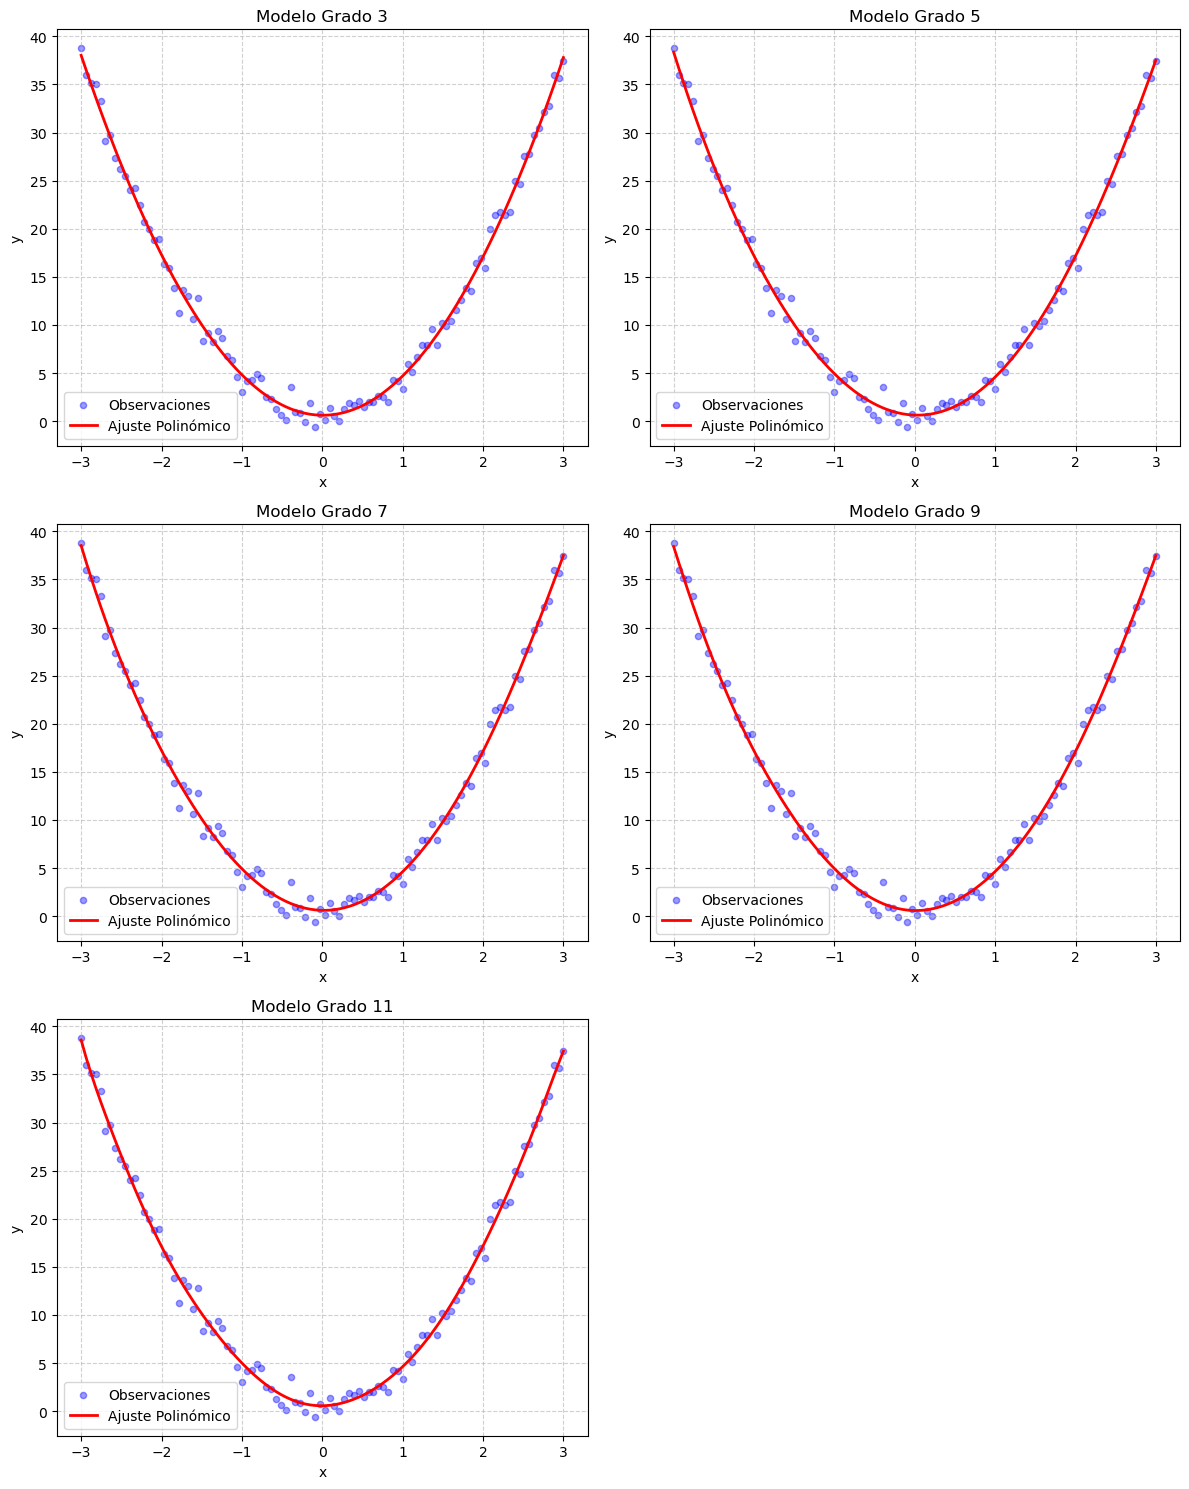

In [42]:
import matplotlib.pyplot as plt

# Definimos los modelos que configuraste
modelos = [
    ("Grado 3", X3),
    ("Grado 5", X5),
    ("Grado 7", X7),
    ("Grado 9", X9),
    ("Grado 11", X11)
]

# Crear una figura con subplots (3 filas, 2 columnas)
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
axes = axes.flatten()

for i, (titulo, X_data) in enumerate(modelos):
    # Re-entrenar el modelo para cada caso
    lr = LinearRegression()
    lr.fit(X_data, y)
    y_pred = lr.predict(X_data)
    
    # Graficar en el respectivo subplot
    ax = axes[i]
    ax.scatter(x, y, color='blue', alpha=0.4, s=20, label='Observaciones')
    ax.plot(x, y_pred, color='red', linewidth=2, label='Ajuste Polinómico')
    ax.set_title(f"Modelo {titulo}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.6)

# Eliminar el sexto subplot que queda vacío
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

**¿Cuál modelo consideras que es mejor? ¿Por qué?**

El modelo cuadrático (grado 2) es el mejor para este caso particular, ya que logra el equilibrio óptimo entre simplicidad y precisión. Dado que los datos fueron generados originalmente a partir de una función cuadrática, este modelo captura la verdadera estructura sin dejarse engañar por el ruido aleatorio. Aunque los modelos de grado superior (como el 11) pueden obtener un $R^2$ ligeramente más alto al "perseguir" cada punto individual, esto genera un sobreajuste que reduce su capacidad de generalización ante nuevos datos, resultando en una complejidad innecesaria para un fenómeno que es intrínsecamente parabólico.

Recuerda que una de las metas de ajustar modelos es para poder interpolar y extrapolar. Los datos que tenemos mantienen $x \in [-3, 3]$. ¿Qué pasaría si quisiéramos saber el valor de $y$ cuando $x=5$?

Calcula la predicción $\hat{y}$ para todos los modelos creados (grados 2, 3, 5, 7, 9, y 11).

In [43]:
import numpy as np
from sklearn.linear_model import LinearRegression

np.random.seed(0)
x = np.linspace(-3, 3, 100)
y = 1 + 4*x**2 + np.random.normal(0, 1, 100)
x_train = x.reshape(-1, 1)

x_nuevo = 5
grados = [2, 3, 5, 7, 9, 11]

print(f"{'Grado':<10} | {'Predicción (y_hat) para x=5':<30}")
print("-" * 45)

for grado in grados:
    X_train_poly = np.hstack([x_train**i for i in range(1, grado + 1)])
    
    lr = LinearRegression()
    lr.fit(X_train_poly, y)
    
    X_test_poly = np.array([[x_nuevo**i for i in range(1, grado + 1)]])
    
    y_hat = lr.predict(X_test_poly)[0]
    
    print(f"{grado:<10} | {y_hat:>30.4f}")

# Referencia teórica: y = 1 + 4*(5^2) = 101
print("-" * 45)
print(f"Valor teórico real: 101.0000")

Grado      | Predicción (y_hat) para x=5   
---------------------------------------------
2          |                       103.9689
3          |                       104.2523
5          |                        84.5990
7          |                        33.7432
9          |                       215.7364
11         |                     -5265.3443
---------------------------------------------
Valor teórico real: 101.0000


¿Cuál modelo crees que sea mejor?

El modelo **cuadrático (grado 2)** es indiscutiblemente **el mejor**. Aunque los modelos de grados superiores (como el 11) logran un ajuste casi perfecto sobre los puntos de entrenamiento, están sufriendo de sobreajuste, lo que significa que están capturando el ruido aleatorio en lugar de la tendencia real. Esto se hizo evidente al intentar extrapolar a **x=5**: mientras que el modelo cuadrático se mantuvo cerca del valor real ($101$), el modelo de grado 11 falló catastróficamente con un resultado absurdo. 

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3